In [13]:
import xarray as xr
import pandas as pd
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt

import pickle

import sys
sys.path.append('../../')
import ndrought.drought_network as dnet

In [2]:
dm_vars = ['usdm', 'spi', ]

intervals = ['30d', '180d']

dm_vars_expanded = {
    'usdm':['USDM'],
    'spi':[f'spi_{interval}' for interval in intervals],
}

In [3]:
path = '/pool0/home/steinjao/data/drought/drought_impact/data/drought_measures/ndrought_products/CONUS_105W/event_comp'

In [4]:
event_comp = dict()

for var_a in dm_vars:
    for var_a_exp in dm_vars_expanded[var_a]:
        var_a_dict = dict()
        for var_b in dm_vars:
            for var_b_exp in dm_vars_expanded[var_b]:
                try:
                    open_path = f'{path}/{var_a_exp}_{var_b_exp}_comp.pickle'
                    with open (open_path, 'rb') as f:
                        unpickler = pickle.Unpickler(f)
                        var_a_dict[var_b_exp] = unpickler.load()
                except:
                    pass        

        event_comp[var_a_exp] = var_a_dict

In [5]:
event_comp['USDM']['USDM'].keys()

dict_keys(['matched_dates', 'af', 'df_USDM'])

In [6]:
event_comp['USDM']['USDM']['matched_dates']

,usdm
0,2000-01-04
1,2000-01-11
2,2000-01-18
3,2000-01-25
4,2000-02-01
...,...
1158,2022-03-15
1159,2022-03-22
1160,2022-03-29
1161,2022-04-05


In [7]:
event_comp['USDM']['USDM']['matched_dates'].iloc[list(event_comp['USDM']['USDM']['af'][0].keys())]

,usdm
1,2000-01-11
2,2000-01-18
3,2000-01-25
4,2000-02-01
5,2000-02-08
6,2000-02-15
7,2000-02-22
8,2000-02-29
9,2000-03-07
10,2000-03-14


In [8]:
usdm_spi30d_ec = event_comp['USDM']['spi_30d']
usdm_spi30d_ec

{'matched_dates':             spi                 usdm
 0    1999-12-31  2000-01-04 00:00:00
 1    2000-01-10  2000-01-11 00:00:00
 2    2000-01-15  2000-01-18 00:00:00
 3    2000-01-25  2000-01-25 00:00:00
 4    2000-01-30  2000-02-01 00:00:00
 ...         ...                  ...
 1144 2021-12-06  2021-12-07 00:00:00
 1145 2021-12-11  2021-12-14 00:00:00
 1146 2021-12-21  2021-12-21 00:00:00
 1147 2021-12-26  2021-12-28 00:00:00
 1148 2021-12-31  2022-01-04 00:00:00
 
 [1149 rows x 2 columns],
 'af': [{10: 0.0044986213902191265,
   11: 0.0032146588443301453,
   12: 0.09948979591836735,
   13: 0.08680555555555555,
   14: 0.08623493131483038,
   15: 0.12218025390829923,
   16: 0.0005483959418700301},
  {20: 0.0012757426644796792,
   21: 0.000606354596167839,
   22: 0.016193446030964495,
   23: 0.03625668449197861,
   24: 0.15385025313082867,
   25: 0.41067114368780966,
   26: 0.01064018442986345,
   27: 0.040764907293752824,
   28: 0.004686074479555445,
   29: 0.0029955460959363053,
  

In [9]:
usdm_spi180d_ec = event_comp['USDM']['spi_180d']
usdm_spi180d_ec

{'matched_dates':             spi                 usdm
 0    1999-12-31  2000-01-04 00:00:00
 1    2000-01-10  2000-01-11 00:00:00
 2    2000-01-15  2000-01-18 00:00:00
 3    2000-01-25  2000-01-25 00:00:00
 4    2000-01-30  2000-02-01 00:00:00
 ...         ...                  ...
 1144 2021-12-06  2021-12-07 00:00:00
 1145 2021-12-11  2021-12-14 00:00:00
 1146 2021-12-21  2021-12-21 00:00:00
 1147 2021-12-26  2021-12-28 00:00:00
 1148 2021-12-31  2022-01-04 00:00:00
 
 [1149 rows x 2 columns],
 'af': [{22: 0.0007669972059387498,
   23: 0.0006970509383378016,
   24: 0.00064343163538874,
   25: 0.0015112037519541429,
   26: 0.0005701254275940707,
   27: 0.0009876543209876543,
   28: 0.001081275905568571},
  {48: 0.0006797518905599456},
  {50: 8.49689863199932e-05,
   51: 0.0004540501271340356,
   52: 0.0003632401017072285},
  {58: 0.001045101537020019,
   59: 0.002624529394729221,
   60: 0.0012321428571428572,
   61: 0.001133592112946996,
   62: 0.0012194703033217684,
   63: 0.00310376

event_comp['spi_30d']['spi_180d']

In [10]:
usdm_spi30d_ec['matched_dates']['usdm'].values

array([Timestamp('2000-01-04 00:00:00'), Timestamp('2000-01-11 00:00:00'),
       Timestamp('2000-01-18 00:00:00'), ...,
       Timestamp('2021-12-21 00:00:00'), Timestamp('2021-12-28 00:00:00'),
       Timestamp('2022-01-04 00:00:00')], dtype=object)

In [11]:
usdm_spi30d_ec['af'][0]

{10: 0.0044986213902191265,
 11: 0.0032146588443301453,
 12: 0.09948979591836735,
 13: 0.08680555555555555,
 14: 0.08623493131483038,
 15: 0.12218025390829923,
 16: 0.0005483959418700301}

In [20]:
usdm_spi30d_ec.keys()

dict_keys(['matched_dates', 'af', 'df_USDM', 'df_spi_30d'])

In [22]:
usdm_spi30d_ec['df_USDM']

{1: 1.0,
 2: 1.0,
 3: 1.0,
 4: 1.0,
 5: 1.0,
 6: 1.0,
 7: 1.0,
 8: 1.0,
 9: 1.0,
 17: 1.0,
 18: 1.0,
 19: 1.0,
 20: 0.7365614641879233,
 21: 0.6718271182393442,
 22: 0.18792543488899766,
 23: 0.2276793109160179,
 24: 0.2276793109160179,
 25: 0.2671761559037065,
 26: 0.3090495512111152,
 27: 0.34315395095367845,
 30: 0.2558293772689193,
 31: 0.2818080357142857,
 32: 1.0,
 33: 0.00033326667999733386,
 35: 0.0288044053796463,
 36: 0.05277058518902123,
 37: 0.05194738988580751,
 40: 0.03133963667268671,
 43: 0.16494054468738012,
 54: 1.0,
 56: 1.0,
 57: 1.0,
 58: 0.0007023230686115613,
 59: 0.0007054354707425161,
 60: 0.0006959438962151359,
 61: 0.0006694014864145827,
 62: 1.0,
 63: 0.0006366827197779773,
 64: 1.0,
 65: 1.0,
 66: 0.0006106057522193171,
 67: 0.0006071645415907711,
 68: 0.0006071645415907711,
 69: 0.000601258016773557,
 70: 0.000601258016773557,
 71: 0.0005187029462327346,
 72: 0.000563163198766969,
 73: 0.000563163198766969,
 74: 0.0005181709964288215,
 75: 0.00051497385517

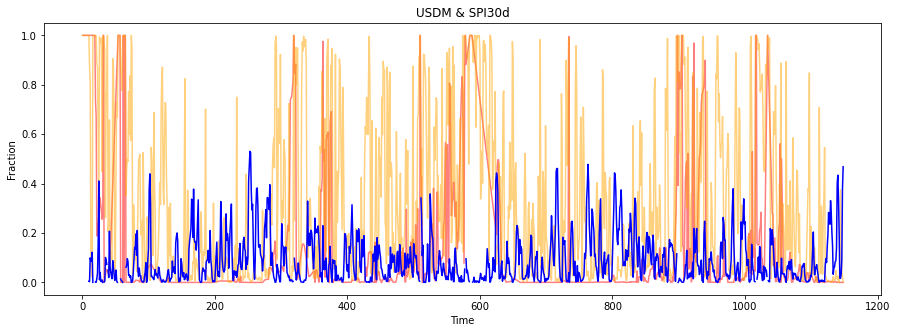

In [31]:
fig, ax = plt.subplots(figsize=(15,5))

ax.plot(list(usdm_spi30d_ec['df_USDM'].keys()), list(usdm_spi30d_ec['df_USDM'].values()), color='r', alpha=0.5)
ax.plot(list(usdm_spi30d_ec['df_spi_30d'].keys()), list(usdm_spi30d_ec['df_spi_30d'].values()), color='orange', alpha=0.5)

for af in usdm_spi30d_ec['af'] :
    ax.plot(list(af.keys()), list(af.values()), color='b')

ax.set_ylabel('Fraction')
ax.set_xlabel('Time')
ax.set_title('USDM & SPI30d');

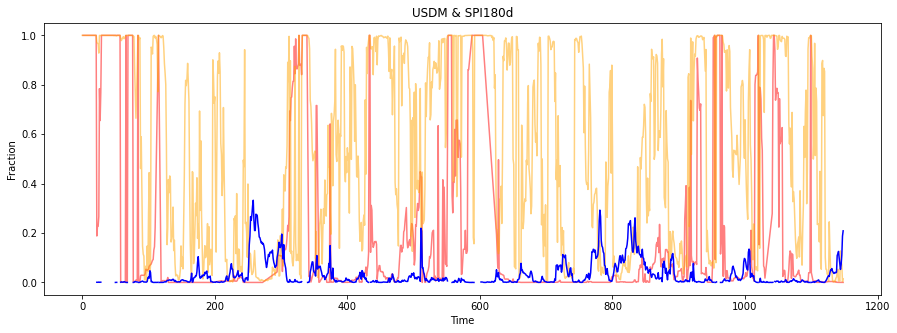

In [33]:
fig, ax = plt.subplots(figsize=(15,5))

ax.plot(list(usdm_spi180d_ec['df_USDM'].keys()), list(usdm_spi180d_ec['df_USDM'].values()), color='r', alpha=0.5)
ax.plot(list(usdm_spi180d_ec['df_spi_180d'].keys()), list(usdm_spi180d_ec['df_spi_180d'].values()), color='orange', alpha=0.5)

for af in usdm_spi180d_ec['af'] :
    ax.plot(list(af.keys()), list(af.values()), color='b')

ax.set_ylabel('Fraction')
ax.set_xlabel('Time')
ax.set_title('USDM & SPI180d');